In [4]:
import pandas as pd
from pandas import read_excel

file_name = 'training_data.xlsx' 
training_data = read_excel(file_name)
training_data = training_data.fillna(0)

In [5]:
feature_cols = list(training_data.columns[1:-6])
target_cols = list(training_data.columns[-4:-3])

X_all = training_data[feature_cols]
Y_all = training_data[target_cols]
print(Y_all)

     Sale_CL
0          0
1          0
2          0
3          0
4          0
..       ...
964        0
965        0
966        0
967        0
968        0

[969 rows x 1 columns]


In [6]:
from sklearn.model_selection import train_test_split
3
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.4, random_state=42)
print(X_train.shape[0])
print(X_test.shape[0])

581
388


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

accuracy_score = accuracy_score(Y_test, Y_predict)
print(accuracy_score)

0.615979381443299


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

model = RandomForestClassifier()
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

accuracy_score = accuracy_score(Y_test, Y_predict)
print(accuracy_score)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.7139175257731959


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

accuracy_score = accuracy_score(Y_test, Y_predict)
print(accuracy_score)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.6752577319587629


In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = MLPClassifier()
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

accuracy_score = accuracy_score(Y_test, Y_predict)
print(accuracy_score)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.6391752577319587


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train, Y_train)

Y_predict = model.predict(X_test)

accuracy_score = accuracy_score(Y_test, Y_predict)
print(accuracy_score)

0.7036082474226805


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [12]:
model = RandomForestClassifier()
model.fit(X_all, Y_all)

filename = "clmodel.pkl"
pickle.dump(model, open(filename, "wb"))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Text(0.5, 0, 'Random Forest Feature Importance')

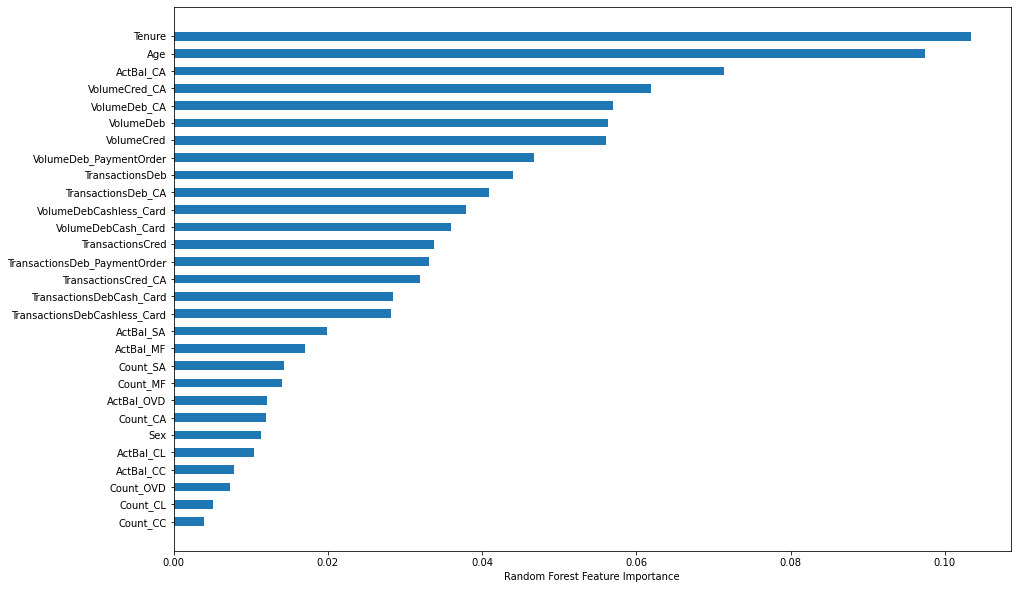

In [19]:
from matplotlib import pyplot
importance = model.feature_importances_
import numpy as np

sorted_idx = model.feature_importances_.argsort()
pyplot.figure(figsize=((15), (10)))
pyplot.barh(np.array(feature_cols)[sorted_idx], model.feature_importances_[sorted_idx], height=0.5)
pyplot.xlabel("Random Forest Feature Importance")

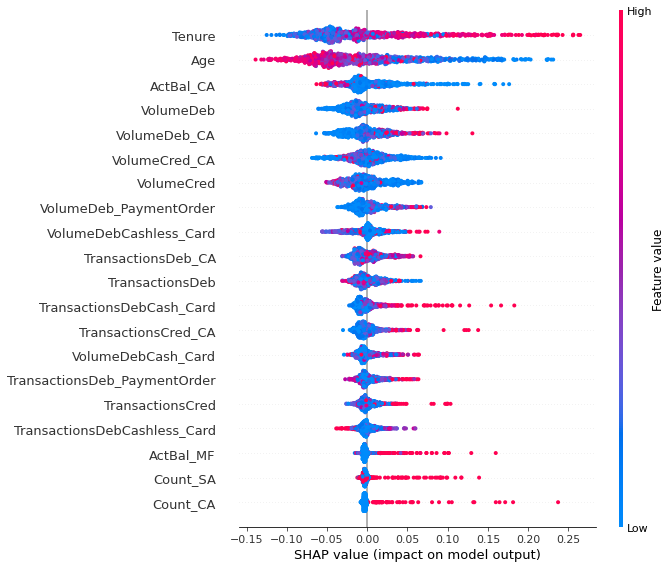

In [13]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_all)

shap.summary_plot(shap_values[1], X_all)